In [28]:
import nest_asyncio
nest_asyncio.apply()

# Hello Paris
A single request to the LLM gives the right answer

In [30]:
from agents import Agent, Runner

agent = Agent(name="Assistant", instructions="You are a helpful assistant")

result = Runner.run_sync(agent, "Tell something about Paris, France, in 100 words")
print(result.final_output)

Paris, the capital of France, is renowned for its rich history, art, and culture. The iconic Eiffel Tower dominates its skyline, while the Louvre houses masterpieces like the Mona Lisa. Known as the "City of Light," Paris boasts stunning architecture, including Notre-Dame and the Arc de Triomphe. Its café culture is legendary, with charming streets lined with boulangeries and boutiques. The Seine River weaves through the city, enhancing its romantic allure. Paris is a hub of fashion, philosophy, and gastronomy, offering exquisite cuisine from patisseries to haute cuisine. A global symbol of elegance and creativity, Paris captivates millions annually.


# Wikipedia lookup
Using a tool

The initial query is sent to the LLM, which responds with a query for the tool. The tool is invoked, the response is sent back to the LLM, and the LLM response gives the correct answer

In [29]:
from agents import Agent, Runner, function_tool
from agents.extensions.handoff_prompt import RECOMMENDED_PROMPT_PREFIX
import wikipedia

@function_tool
def wikipedia_lookup(q: str) -> str:
    """Look up a query in Wikipedia and return the result"""
    return wikipedia.page(q).summary

research_agent = Agent(
    name="Research agent",
    instructions="You research topics using Wikipedia and report on the results.",
    model="o4-mini",
    tools=[wikipedia_lookup],
)

result = Runner.run_sync(research_agent, "What is the height of the famous tower in Paris, France?")
print(result.final_output)

The Eiffel Tower in Paris stands 330 metres (1,083 feet) tall from its base to the tip of its highest antenna.


# Essays for kids
a multi-agent app with manual hand off

The initial prompt is given to the Research agent which responds with an essay. The output of the Research agent is fed to the Writer agent as its input. The Writer agent takes the output of the first agent and writes the modified version.

In [31]:
from agents import Agent, Runner, function_tool, handoff
from agents.extensions.handoff_prompt import RECOMMENDED_PROMPT_PREFIX # Not used


writer_agent = Agent(
    name="Writer agent",
    instructions=f"""
                    Re-write the article so that it is suitable for kids aged around 8. 
                    Be enthusiastic about the topic - everything is an adventure! 
                    """,
    model="gpt-4o",
)

researcher_agent = Agent(
    name="Research agent",
    instructions=f"""
                    You research topics and report on the results. """,
    
    model="gpt-4o",
)

result = Runner.run_sync(researcher_agent, "Write an essay about the capital city of France of no more than 200 words")
result2 = Runner.run_sync(writer_agent, result.final_output)
print(result2.final_output)

Hey adventurers! Let's dive into the magical world of Paris, the capital city of France, where everything feels like a fantastic adventure! 🌟

Welcome to "The City of Light," where stories come alive and dreams take flight! Maybe you’ve heard of the dazzling Eiffel Tower? It's like a giant shining rocket reaching for the sky, and it's a super cool place to start our journey!

Next, we're off to the grand Notre-Dame Cathedral. Imagine a castle where knights and princesses might have lived—it's full of mystery and exciting tales! And then, there's the Palace of Versailles, which looks like it could be a king’s royal playground!

For all you art explorers, Paris is a treasure chest! The Louvre, a gigantic museum, is like a magical time-travel machine. You can see famous paintings like the mystifying Mona Lisa. And in the dreamy streets of Montmartre, artists like Picasso and Van Gogh once painted masterpieces!

Feeling hungry? Paris is a foodie’s paradise! From tiny cafés where you can mu

# Essays for kids 2
Multiple agents with automatic handoff

The initial prompt is given to the Research agent which responds with an essay. The Research agent hands off to the Writer agent with all of the LLM context. The Writer agent takes the output of the first agent, along with the instructions and writes the modified version.

In [34]:
from agents import Agent, Runner, function_tool, handoff
from agents.extensions.handoff_prompt import RECOMMENDED_PROMPT_PREFIX

writer_agent = Agent(
    name="Writer agent",
    instructions=f"""
                    Re-write the article so that it is suitable for kids aged around 8. 
                    Be enthusiastic about the topic - everything is an adventure! 
                    """,
    model="gpt-4o",
)

researcher_agent = Agent(
    name="Research agent",
    instructions=f"""
                    You research topics and report on the results. 
                    When you have a result send it to the Writer agent""",
    
    model="gpt-4o",
    handoffs = [writer_agent]
)



result = Runner.run_sync(researcher_agent, "Write an essay about the capital city of France of no more than 200 words")
print(result.final_output)


Hey kids, get ready for an adventure to a super cool place: the capital city of France, Paris! 🎉

Paris is famous for a big tower called the Eiffel Tower. It's like a giant superhero watching over the city! You can ride an elevator to the top and see the whole city. Imagine what it’s like to be that high up!

Paris is also home to the magical museum, the Louvre. It’s filled with amazing art, like a treasure chest of paintings and sculptures. And guess what? The famous Mona Lisa lives there! Her smile is a mystery waiting for you to solve.

If you love delicious treats, Paris is a wonderland. Try a sweet crepe or a crunchy baguette. Yum! 🍰

The city has cool streets called boulevards where you can go on fun walks and see pretty parks. You might even spot people painting or playing music. How awesome is that?

Paris is like a giant playground with so many things to explore. So, pack your bags in your imagination and get ready for an exciting journey to this amazing city! 🌟


# Essays for kids, teenagers or adults
Auto handoffs with agent decision making

In [35]:
from agents import Agent, Runner, function_tool, handoff
from agents.extensions.handoff_prompt import RECOMMENDED_PROMPT_PREFIX

adult_writer_agent = Agent(
    name="Adult Writer Agent",
    instructions=f"""
                    Write the article based on the information given that it is suitable for adults interested in culture. 
                    Be enthusiastic!
                    """, 
    model="gpt-4o",
)



teen_writer_agent = Agent(
    name="Teen Writer Agent",
    instructions=f"""
                    Write the article based on the information given that it is suitable for teenagers who want to have a cool time. 
                    Be enthusiastic!
                    """, 
    model="gpt-4o",
)

kid_writer_agent = Agent(
    name="Kid Writer Agent",
    instructions=f"""
                    Write the article based on the information given that it is suitable for kids of around 8 years old. 
                    Be enthusiastic!
                    """, 
    model="gpt-4o",
)


researcher_agent = Agent(
    name="Research agent",
    instructions=f"""
                    Find information on the topic(s) given. When you have a result send it to the appropriate writer agent""",
    
    model="gpt-4o",
    handoffs = [kid_writer_agent, teen_writer_agent, adult_writer_agent]
)


In [36]:
result = Runner.run_sync(researcher_agent, "Write an essay about the capital city of France of no more than 200 words for kids")
print(result.final_output)

Hey kids! Let me tell you about Paris, the awesome capital city of France. 🌟

Paris is known as the "City of Light" because it was one of the first cities in the world to have street lights. It's a magical place full of fun and exciting things to see!

One of the coolest things in Paris is the Eiffel Tower. It's a huge tower made of iron, and you can go all the way to the top to see an amazing view of the city! 🗼

Paris is also famous for its delicious bread called baguettes and yummy pastries like croissants. 🍞🥐 Imagine starting your day with a tasty croissant in a cozy café.

If you love art, the Louvre Museum is the place to be! It's home to the Mona Lisa, one of the most famous paintings in the world. 🎨

The city is filled with beautiful parks where you can play and enjoy picnics. Don't forget the river Seine, where you can take a boat ride!

Paris is a place where adventures come alive, and there’s always something new to discover. So pack your bags and get ready for an unforgetta

In [17]:
result = Runner.run_sync(researcher_agent, "Write an essay about the capital city of France of no more than 200 words for teenagers")
print(result.final_output)

Hey there, future world travelers! 🌟 Ready to explore a city that’s the epitome of cool? Let’s dive into the vibrant vibe of Paris, the heart of France!

Paris isn’t just a city; it’s a whole mood. Picture yourself strolling down the Champs-Élysées with its epic shops and cafés, or snapping pics at the Eiffel Tower (selfie game strong!). For all you art lovers, the Louvre awaits with Mona Lisa’s mysterious smile. 🎨🖼️

Feeling adventurous? How about a boat ride on the Seine River where the best views will have you saying “Ooh la la!” Get lost in Le Marais, a district bursting with quirky stores and tasty treats. And speaking of treats, don’t miss a chance to devour a crepe or a macaron!

Paris is also a music and fashion hub. Catch some street performers or dive into vintage shops and find yourself a one-of-a-kind piece. 🎶👗

Whether you’re a foodie, a history buff, or a fashionista, Paris has something cool for every teen explorer. So grab your backpack and your sense of adventure; the 

In [18]:
result = Runner.run_sync(researcher_agent, "Write an essay about the capital city of France of no more than 200 words for adults")
print(result.final_output)

Paris, the radiant capital of France, is a cultural mecca that has magnetized dreamers, artists, and intellectuals for centuries. With its enchanting blend of historical grandeur and modern vibrancy, Paris stands as a testament to human creativity and resilience.

Wander through the cobblestone streets and you'll be swept away by iconic landmarks such as the majestic Eiffel Tower, the Gothic splendor of Notre-Dame Cathedral, and the artistic treasures housed in the Louvre Museum. Each corner of this city tells a story, from the charming Marais district with its medieval echoes to the bohemian flair of Montmartre, where artists like Picasso once roamed.

Parisian cafes buzz with energy, offering a rich tapestry of flavors, where leisurely sips of espresso and bites of buttery croissants become cultural rituals. Moreover, the Seine River gently wends through the city, providing serene views and romantic boat rides, epitomizing the allure of Parisian life.

Whether it's fashion, art, hist

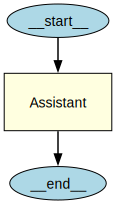

In [27]:
from agents.extensions.visualization import draw_graph
draw_graph(agent)

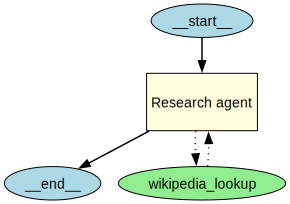

In [26]:
draw_graph(research_agent)

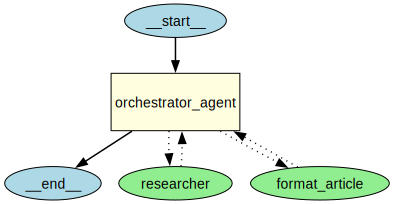

In [23]:
draw_graph(orchestrator_agent)

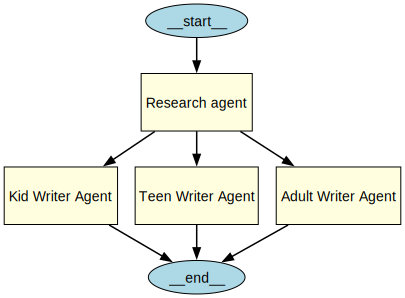

In [25]:
draw_graph(researcher_agent)